In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('health care diabetes.csv')

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

Question 1.
Perform descriptive analysis. It is very important to understand the variables and corresponding values. We need to think through - Can minimum value of below listed columns be zero (0)? On these columns, a value of zero does not make sense and thus indicates missing value.
Glucose
BloodPressure
SkinThickness
Insulin
BMI


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df[df['Insulin']<0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
l1=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [9]:
df[(df['Glucose']!=0)&(df['Outcome']==0)]['Glucose'].mean()

110.64386317907444

In [10]:
df.loc[(df['Glucose']==0)&(df['Outcome']==0),'Glucose']

75     0
182    0
342    0
Name: Glucose, dtype: int64

In [11]:
def findmissingvalue(df):
    for col in l1:
        print('-----------------',col,'---------------')
        display(df[df[col]==0].groupby('Outcome').size())
        print()

In [12]:
findmissingvalue(df)

----------------- Glucose ---------------


Outcome
0    3
1    2
dtype: int64


----------------- BloodPressure ---------------


Outcome
0    19
1    16
dtype: int64


----------------- SkinThickness ---------------


Outcome
0    139
1     88
dtype: int64


----------------- Insulin ---------------


Outcome
0    236
1    138
dtype: int64


----------------- BMI ---------------


Outcome
0    9
1    2
dtype: int64

In [13]:
def missing_value_removal(df):
    for col in l1:
        df.loc[(df[col]==0)&(df['Outcome']==0),col]=df[(df[col]!=0)&(df['Outcome']==0)][col].mean()
        df.loc[(df[col]==0)&(df['Outcome']==1),col]=df[(df[col]!=0)&(df['Outcome']==1)][col].mean()

In [14]:
missing_value_removal(df)

In [15]:
findmissingvalue(df)

----------------- Glucose ---------------


Series([], dtype: int64)


----------------- BloodPressure ---------------


Series([], dtype: int64)


----------------- SkinThickness ---------------


Series([], dtype: int64)


----------------- Insulin ---------------


Series([], dtype: int64)


----------------- BMI ---------------


Series([], dtype: int64)

# 2.Visually explore these variable, you may need to look for the distribution of these variables using histograms. Treat the missing values accordingly.

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.697358,30.462008,44.000,99.75000,117.000000,141.000000,199.00
BloodPressure,768.0,72.428141,12.106044,24.000,64.00000,72.000000,80.000000,122.00
SkinThickness,768.0,29.247042,8.923908,7.000,25.00000,28.000000,33.000000,99.00
Insulin,768.0,157.003527,88.860914,14.000,121.50000,130.287879,206.846154,846.00
BMI,768.0,32.446420,6.878970,18.200,27.50000,32.050000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [17]:
def boxplotgraph(df,l2):
    fig = plt.figure(figsize = (15,15))
    j=0
    for i in l2:
        ax2 = fig.add_subplot(3,3,j+1)
        sns.boxplot(df[i])
        j=j+1

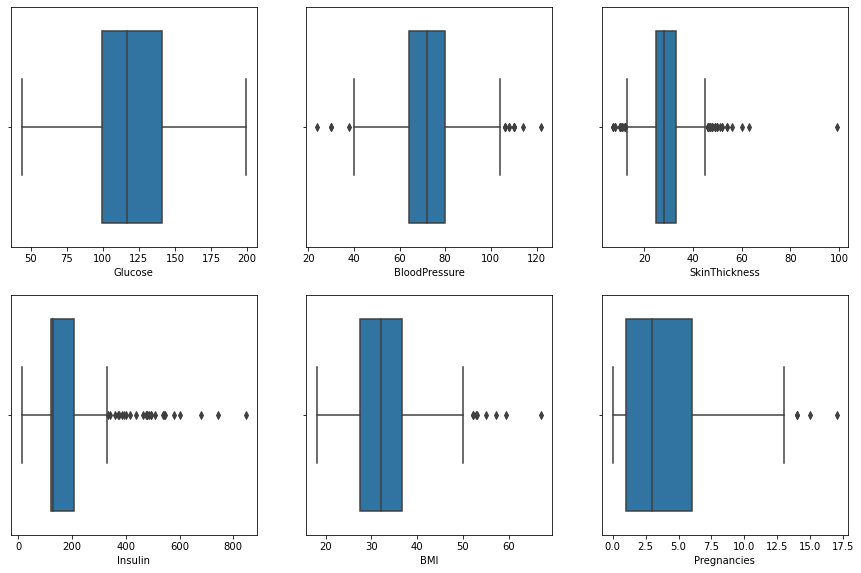

In [18]:
l2=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Pregnancies']
boxplotgraph(df,l2)

In [19]:
def histplotgraph(df,l2):
    fig = plt.figure(figsize = (15,15))
    j=0
    for i in l2:
        ax2 = fig.add_subplot(3,3,j+1)
        sns.histplot(df[i],kde=True)
        j=j+1

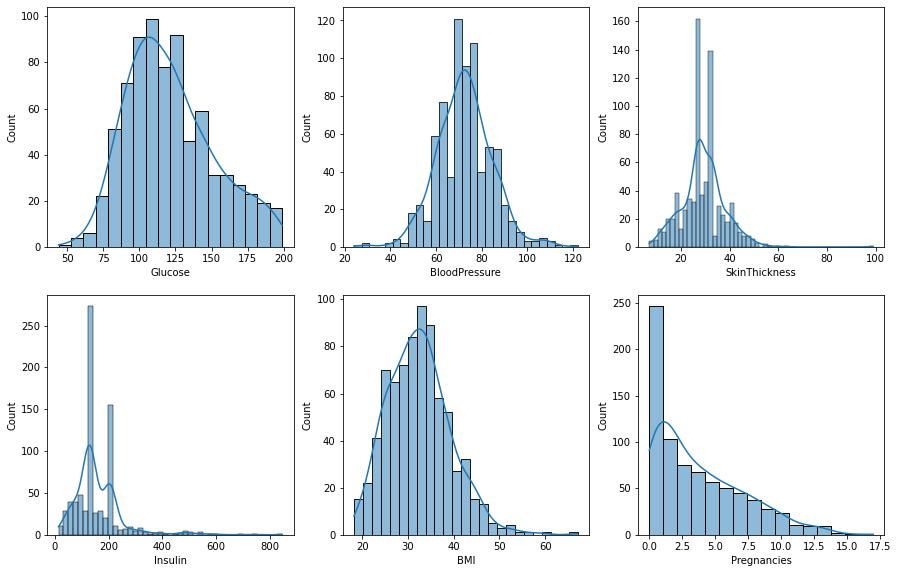

In [20]:
l2=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Pregnancies']
histplotgraph(df,l2)

#Observation:-
 From the above we can see Glucose and Blood Presuure data is normally distributed and SkinThicknes, Insulin, BMi,Pregnancies are right skewed.

In [21]:
#Treating Outlier
def detectOutlier(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    IQR=q3-q1
    lowerlimit=q1-1.5*IQR
    upperlimit=q3+1.5*IQR
    return lowerlimit,upperlimit

In [22]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [23]:
detectOutlier(df,'Outcome')

(-1.5, 2.5)

In [24]:
l2=['BloodPressure','Insulin','BMI','Pregnancies','Age']
def treatOutlier(df):
    for col in l2:
        lower,upper=detectOutlier(df,col)
        df.loc[df[col]<lower,col]=lower
        df.loc[df[col]>upper,col]=upper

In [25]:
treatOutlier(df)

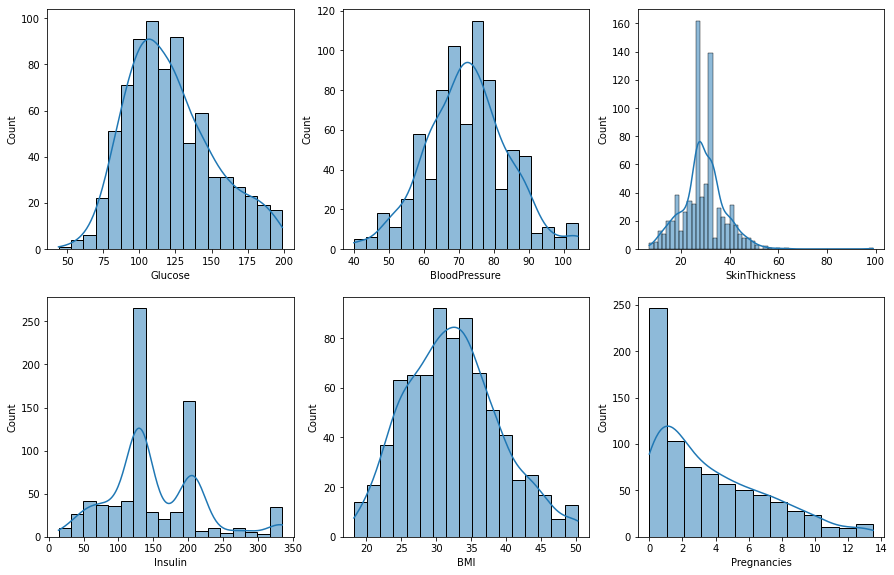

In [26]:
l2=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Pregnancies']
histplotgraph(df,l2)

# 3.We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

<AxesSubplot:ylabel='count'>

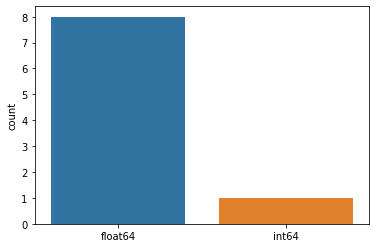

In [27]:
sns.countplot(df.dtypes)

In [28]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [29]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [30]:
detectOutlier(df,'Insulin')

(-6.519230769230774, 334.86538461538464)

In [31]:
df[df['Insulin']<=0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


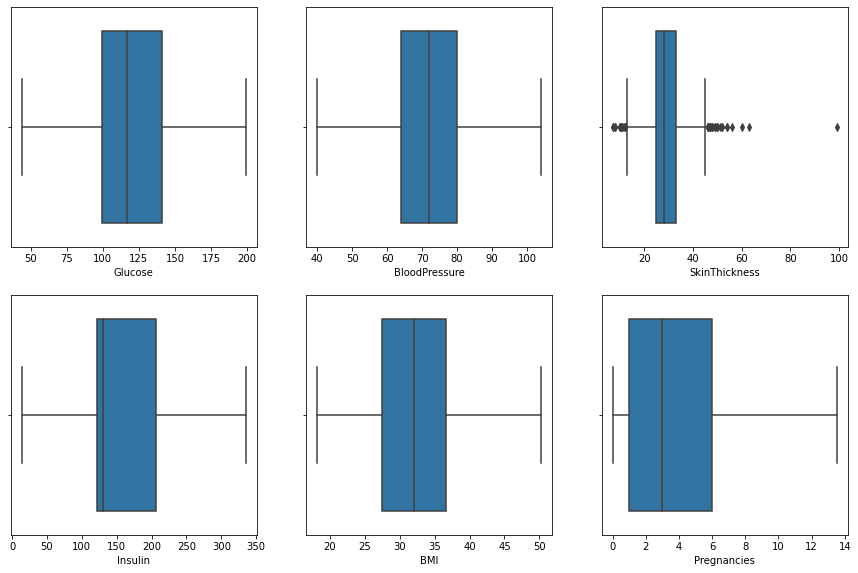

In [32]:
l2=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Pregnancies']
boxplotgraph(df,l2)

6.Perform correlation analysis. Visually explore it using a heat map.

In [33]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128527,0.211240,0.092986,0.144279,0.029821,-0.034448,0.549695,0.220392
Glucose,0.128527,1.000000,0.225802,0.235040,0.532545,0.237939,0.138125,0.270593,0.495954
BloodPressure,0.211240,0.225802,1.000000,0.208950,0.134749,0.292062,-0.000020,0.332456,0.178646
SkinThickness,0.092986,0.235040,0.208950,1.000000,0.237902,0.565601,0.102426,0.137573,0.308094
Insulin,0.144279,0.532545,0.134749,0.237902,1.000000,0.267895,0.105107,0.202183,0.495294
BMI,0.029821,0.237939,0.292062,0.565601,0.267895,1.000000,0.146356,0.037813,0.316143
DiabetesPedigreeFunction,-0.034448,0.138125,-0.000020,0.102426,0.105107,0.146356,1.000000,0.033585,0.173844
Age,0.549695,0.270593,0.332456,0.137573,0.202183,0.037813,0.033585,1.000000,0.242702
Outcome,0.220392,0.495954,0.178646,0.308094,0.495294,0.316143,0.173844,0.242702,1.000000


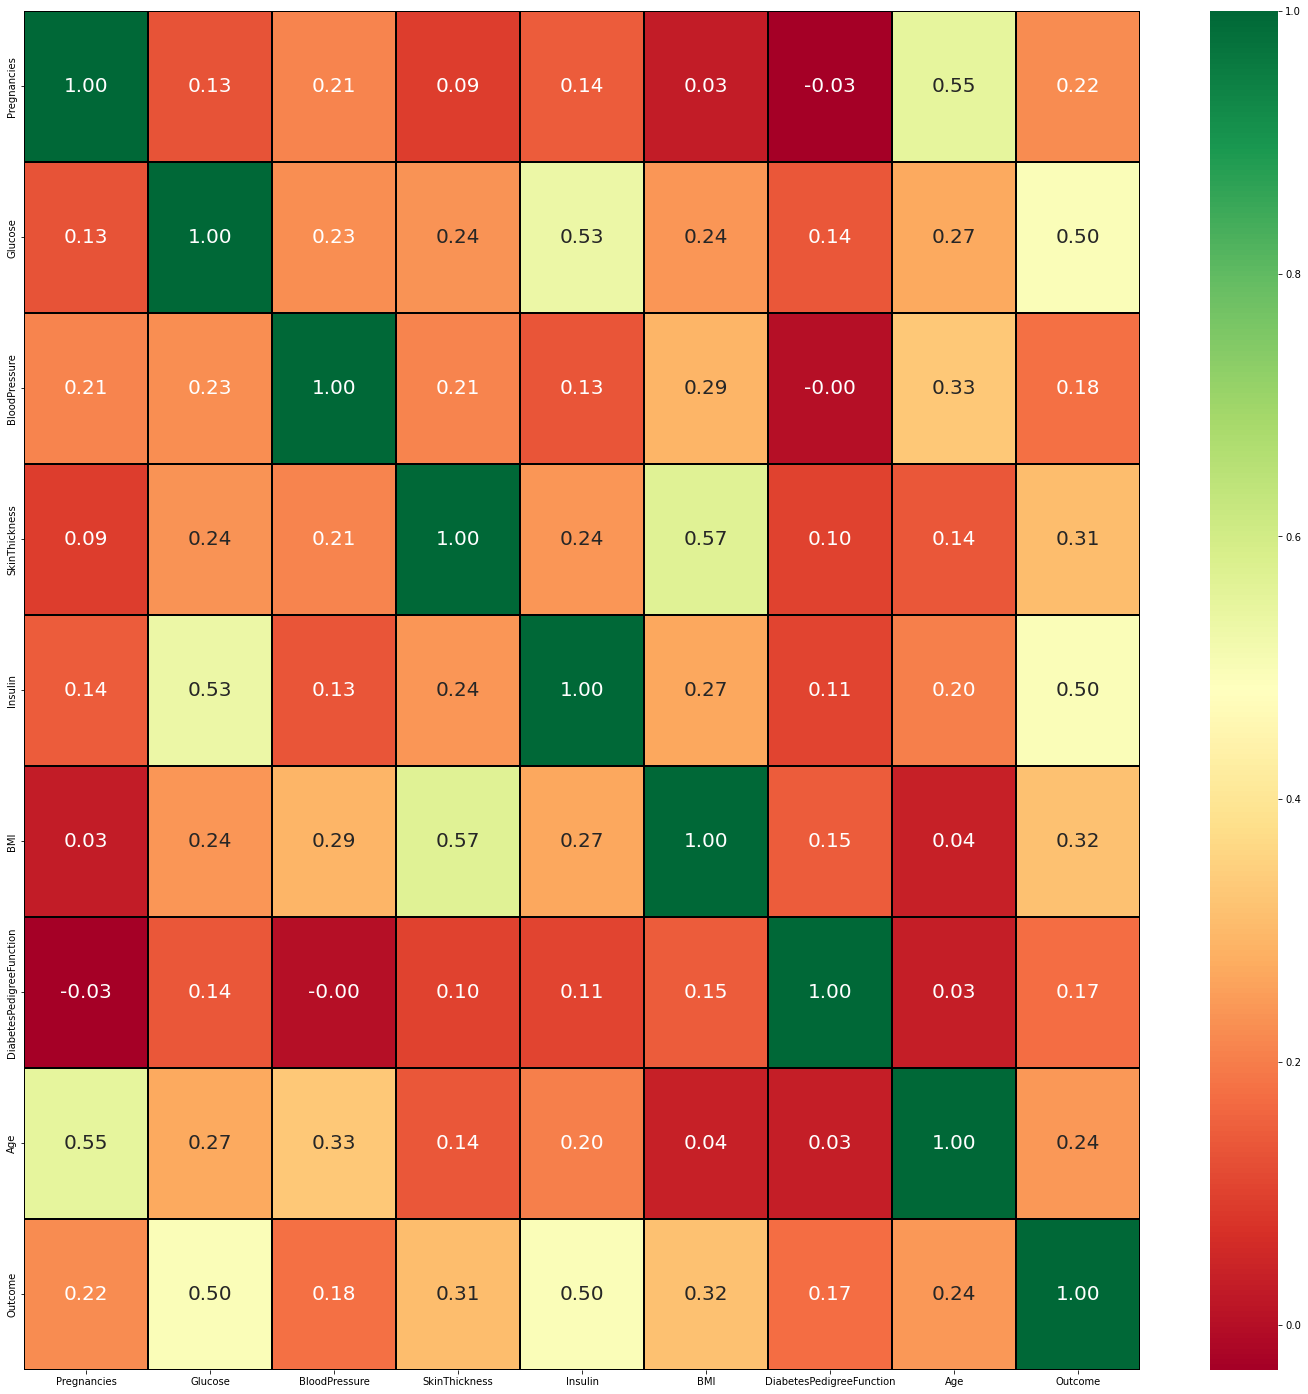

In [34]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(),annot = True, annot_kws= {'size' : 20},
           cmap = "RdYlGn", fmt = '.2f', linewidths = 2, linecolor = 'black')
plt.show()

# 5.Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

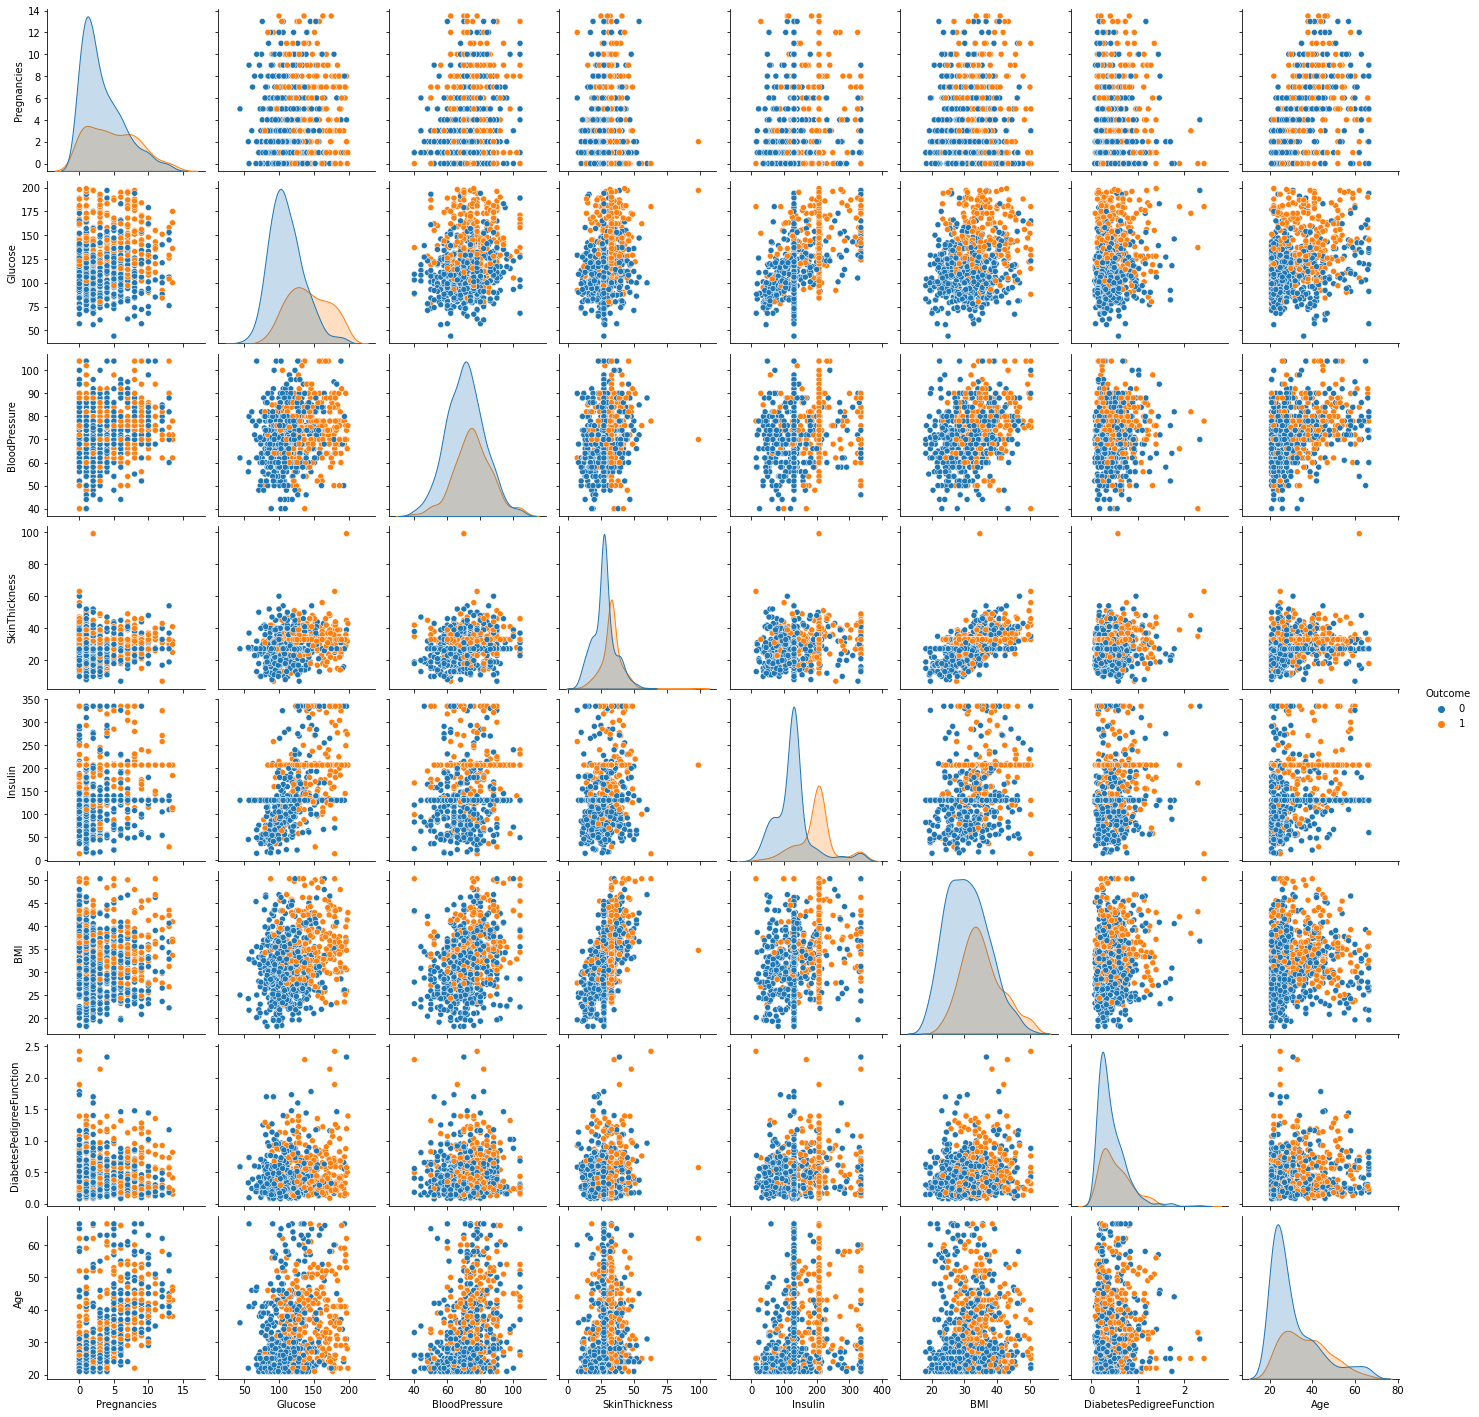

In [35]:
sns.pairplot(df,hue='Outcome')

# Observation:-
Scatter plot is explaning all the variables

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.837240,3.344157,0.000,1.00000,3.000000,6.000000,13.500000
Glucose,768.0,121.697358,30.462008,44.000,99.75000,117.000000,141.000000,199.000000
BloodPressure,768.0,72.399495,11.706921,40.000,64.00000,72.000000,80.000000,104.000000
SkinThickness,768.0,29.247042,8.923908,7.000,25.00000,28.000000,33.000000,99.000000
Insulin,768.0,151.514419,67.470301,14.000,121.50000,130.287879,206.846154,334.865385
BMI,768.0,32.384571,6.671300,18.200,27.50000,32.050000,36.600000,50.250000
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.420000
Age,768.0,33.199870,11.628404,21.000,24.00000,29.000000,41.000000,66.500000
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.000000


In [37]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()

In [38]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

<AxesSubplot:ylabel='count'>

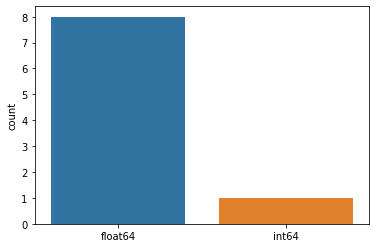

In [39]:
sns.countplot(df.dtypes)

In [40]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25,stratify=y)

In [42]:
scaler1.fit(x_train)

StandardScaler()

In [43]:
x_train_scaled=scaler1.transform(x_train)
x_test_scaled=scaler1.transform(x_test)

In [44]:
x_test_scaled.shape

(192, 8)

In [45]:
def buildModel(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    test_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    train_accuracy = round(accuracy_score(y_train,train_pred),2)
    test_accuracy = round(accuracy_score(y_test,test_pred),2)
    confusion_Matrix = confusion_matrix(y_test,test_pred)
    classification_Report = classification_report(y_test,test_pred)
    return train_accuracy,test_accuracy,confusion_Matrix,classification_Report,test_pred

In [46]:
from sklearn.metrics import roc_auc_score,roc_curve
def plot_roc_auc(model,x_test):
    logit_roc_auc=roc_auc_score(y_test,model.predict(x_test))
    fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(x_test)[:,1])
    print('Accuracy of ROC curve',round(logit_roc_auc*100),'%')
    print()
    plt.figure()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0,1.05])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive Rate')
    plt.title('Receiver Operating Curve(ROC)')
    plt.show()
    return round(logit_roc_auc*100)

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
def plotCM(conf_matrix):
    ConfusionMatrixDisplay(conf_matrix,display_labels=['no Diabetics','Diabetics']).plot()
    plt.show()

In [48]:
train_score=[]
test_score=[]
model_name=[]
accuracy=[]
missclassified=[]

Training Accuracy:- 0.84
Testing Accuracy:- 0.78


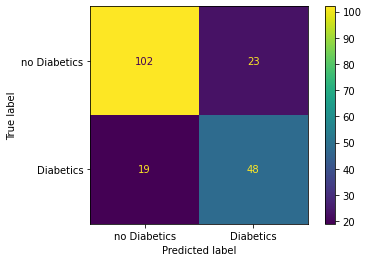


-------------------------Classification Report----------------------------------------

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       125
           1       0.68      0.72      0.70        67

    accuracy                           0.78       192
   macro avg       0.76      0.77      0.76       192
weighted avg       0.78      0.78      0.78       192

Accuracy of ROC curve 77 %



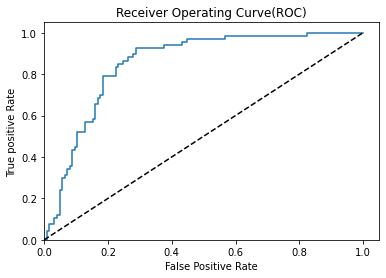

In [49]:
lr=LogisticRegression()
train_accuracy,test_accuracy,confusion_Matrix,classification_Report,test_pred=buildModel(lr,x_train_scaled,y_train,x_test_scaled,y_test)
print('Training Accuracy:-',train_accuracy)
print('Testing Accuracy:-',test_accuracy)
plotCM(confusion_Matrix)
print()
print('-------------------------Classification Report----------------------------------------')
print()
print(classification_Report)
p=plot_roc_auc(lr,x_test_scaled)
train_score.append(train_accuracy)
test_score.append(test_accuracy)
model_name.append('LR')
accuracy.append(p)
#print(confusion_Matrix[0][1],confusion_Matrix[1][0])
#print(((confusion_Matrix[0][1]+confusion_Matrix[1][0])/x_test_scaled.shape[0])*100)
missclass=((confusion_Matrix[0][1]+confusion_Matrix[1][0])/x_test_scaled.shape[0])*100
missclassified.append(missclass)

In [50]:
print(train_score)
print(test_score)
print(model_name)


[0.84]
[0.78]
['LR']


Training Accuracy:- 0.89
Testing Accuracy:- 0.82
[0 1]


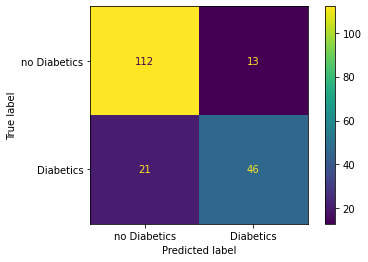


-------------------------Classification Report----------------------------------------

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       125
           1       0.78      0.69      0.73        67

    accuracy                           0.82       192
   macro avg       0.81      0.79      0.80       192
weighted avg       0.82      0.82      0.82       192

Accuracy of ROC curve 79 %



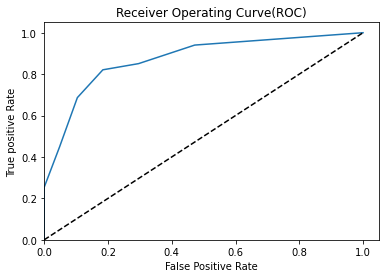

In [51]:
kn=KNeighborsClassifier(n_neighbors=6)
train_accuracy,test_accuracy,confusion_Matrix,classification_Report,test_pred=buildModel(kn,x_train_scaled,y_train,x_test_scaled,y_test)
print('Training Accuracy:-',train_accuracy)
print('Testing Accuracy:-',test_accuracy)
print(kn.classes_)
plotCM(confusion_Matrix)
print()
print('-------------------------Classification Report----------------------------------------')
print()
print(classification_Report)
p=plot_roc_auc(kn,x_test_scaled)
train_score.append(train_accuracy)
test_score.append(test_accuracy)
model_name.append('KNN')
accuracy.append(p)
missclass=((confusion_Matrix[0][1]+confusion_Matrix[1][0])/x_test_scaled.shape[0])*100
missclassified.append(missclass)

0,0 =True Negative
0,1=False Negative
1,0=False Positive
1,1=True Positive

In [52]:
print(train_score)
print(test_score)
print(model_name)


[0.84, 0.89]
[0.78, 0.82]
['LR', 'KNN']


Training Accuracy:- 0.85
Testing Accuracy:- 0.84
[0 1]


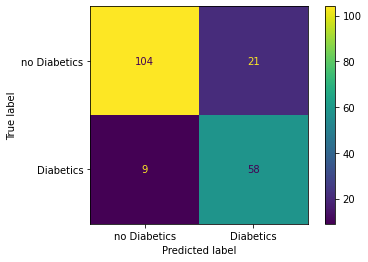


-------------------------Classification Report----------------------------------------

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       125
           1       0.73      0.87      0.79        67

    accuracy                           0.84       192
   macro avg       0.83      0.85      0.83       192
weighted avg       0.86      0.84      0.85       192

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       125
           1       0.73      0.87      0.79        67

    accuracy                           0.84       192
   macro avg       0.83      0.85      0.83       192
weighted avg       0.86      0.84      0.85       192



AttributeError: predict_proba is not available when  probability=False

In [53]:
svc=SVC(kernel='linear')
train_accuracy,test_accuracy,confusion_Matrix,classification_Report,test_pred=buildModel(svc,x_train_scaled,y_train,x_test_scaled,y_test)
print('Training Accuracy:-',train_accuracy)
print('Testing Accuracy:-',test_accuracy)
print(svc.classes_)
plotCM(confusion_Matrix)
print()
print('-------------------------Classification Report----------------------------------------')
print()
print(classification_Report)
train_score.append(train_accuracy)
test_score.append(test_accuracy)
print(classification_Report)
p=plot_roc_auc(svc,x_test_scaled)
model_name.append('SVC')
accuracy.append(p)
missclass=((confusion_Matrix[0][1]+confusion_Matrix[1][0])/x_test_scaled.shape[0])*100
missclassified.append(missclass)

In [ ]:
from sklearn.model_selection import GridSearchCV
DT=DecisionTreeClassifier()
param_grid = {
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a grid search object
grid_search = GridSearchCV(DT, param_grid=param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(x_train_scaled,y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


In [ ]:
dt=DecisionTreeClassifier(max_depth= 3,criterion='entropy')
train_accuracy,test_accuracy,confusion_Matrix,classification_Report,test_pred=buildModel(dt,x_train_scaled,y_train,x_test_scaled,y_test)
print('Training Accuracy:-',train_accuracy)
print('Testing Accuracy:-',test_accuracy)
print(dt.classes_)
plotCM(confusion_Matrix)
print()
print('-------------------------Classification Report----------------------------------------')
print()
print(classification_Report)
train_score.append(train_accuracy)
test_score.append(test_accuracy)
print(classification_Report)
p=plot_roc_auc(dt,x_test_scaled)
model_name.append('DT')
accuracy.append(p)
missclass=((confusion_Matrix[0][1]+confusion_Matrix[1][0])/x_test_scaled.shape[0])*100
missclassified.append(missclass)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
param_grid = {
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a grid search object
grid_search = GridSearchCV(DT, param_grid=param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(x_train_scaled,y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [ ]:
rf=RandomForestClassifier(max_depth= 4, max_features='auto', min_samples_leaf=1, min_samples_split= 4)
train_accuracy,test_accuracy,confusion_Matrix,classification_Report,test_pred=buildModel(rf,x_train_scaled,y_train,x_test_scaled,y_test)
print('Training Accuracy:-',train_accuracy)
print('Testing Accuracy:-',test_accuracy)
print(rf.classes_)
plotCM(confusion_Matrix)
print()
print('-------------------------Classification Report----------------------------------------')
print()
print(classification_Report)
train_score.append(train_accuracy)
test_score.append(test_accuracy)
p=plot_roc_auc(rf,x_test_scaled)
model_name.append('RF')
accuracy.append(p)
missclass=((confusion_Matrix[0][1]+confusion_Matrix[1][0])/x_test_scaled.shape[0])*100
missclassified.append(missclass)

In [ ]:
plt.figure(figsize=(8, 5))

# Create a bar chart for the first set of values
plt.bar(model_name, train_score, color='blue', width=0.4)

#Create a bar chart for the second set of values
plt.bar([i + 0.4 for i in range(len(model_name))], test_score, color='red', width=0.4)

# Add a legend
plt.legend(['Train Score', 'Test Score'])

# Add axis labels and a title
plt.xlabel('Model Name')
plt.ylabel('Value')
plt.title('Dual Bar Chart')

#Show the plot
plt.show()

In [ ]:
models_ML_df = pd.DataFrame({'Model Name' : model_name, 'Training Score' : train_score, 'Testing Score' : test_score,'ROC-AUC Score':accuracy,'missclassified':missclassified})
print(models_ML_df)

In [ ]:
f,axes=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x="Model Name",y="missclassified",data=models_ML_df,ax=axes[0])
sns.barplot(x="Model Name",y="ROC-AUC Score",data=models_ML_df,ax=axes[1])
axes[0].set(xlabel="Classifier Name",ylabel="missclassified")
axes[1].set(xlabel="Classifier Name",ylabel="ROC-AUC Score")

for p in axes[0].patches:
    height=p.get_height()
    axes[0].text(p.get_x()+p.get_width()/2,height+0.1,'{:1.3f}'.format(height),ha="center")
    
for p in axes[1].patches:
    height=p.get_height()
    axes[1].text(p.get_x()+p.get_width()/2,height+0.010,'{:1.3f}'.format(height),ha="center")
    
plt.show()

## Observation:-
From the above charts we can conclude Random Forest is giving less number of missclassified record. So Random Forest is giving.

In [ ]:
df['Age']

In [ ]:
mapping={0:'non diabetic',1:'diabetic'}
df['Diabetic status']=df['Outcome'].map(mapping)
df.head()

In [ ]:
df.to_excel('output.xlsx',sheet_name='Diabetic Data',index=False)

In [ ]:
df[df['Diabetic status']=='diabetic']['Diabetic status'].size

In [ ]:
df[df['Diabetic status']=='non diabetic']['Diabetic status'].size

In [ ]:
bins=[20,25,30,35,40,45,50,55,60,65,70,75,80,85]
category=['20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80','80-85']
df['Age Category']=pd.cut(df['Age'],bins,labels=category)

In [ ]:
df.head()

In [ ]:
df.to_excel('output.xlsx',sheet_name='Diabetic Data',index=False)